If data is normally distributed then use mean. If data is skewed then use median.

If data have less than 5% missing values


Disadvantage:
    
    1) Change Distribuations
    
    2) Make outliers
    
    3) Change Co-variance or Co-relation between columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('datasets/titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.shape

(891, 4)

In [6]:
df.ndim

2

In [7]:
# Show the missing value in percentage order

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
# Split the dataset into X and y

X = df.drop(columns=['Survived'])

y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
# Show the missing value for X_train data in percentage order

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [12]:
# Show the missing value for X_test data in percentage order

X_test.isnull().mean()*100

Age       16.201117
Fare       5.027933
Family     0.000000
dtype: float64

In [13]:
# Find-out the mean and median value

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
print(f"mean_age: {mean_age}, Median_age: {median_age}")
print(f"mean_fare: {mean_fare}, Median_fare: {median_fare}")

mean_age: 29.78590425531915, Median_age: 28.75
mean_fare: 32.61759689349112, Median_fare: 14.4583


In [15]:
X_train.loc[:, 'Age'].isna()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age, Length: 712, dtype: bool

In [16]:
 X_train.loc[:, 'Age'].fillna(median_age)

30     40.00
10      4.00
873    47.00
182     9.00
876    20.00
       ...  
534    30.00
584    28.75
493    71.00
527    28.75
168    28.75
Name: Age, Length: 712, dtype: float64

In [17]:
# Fill the missing value using mean and median value

X_train['Age_median'] = X_train.loc[:, 'Age'].fillna(median_age)
X_train['Age_mean'] = X_train.loc[:, 'Age'].fillna(mean_age)

X_train['Fare_median'] = X_train.loc[:, 'Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train.loc[:, 'Fare'].fillna(mean_fare)

In [18]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
416,34.0,32.5000,2,34.0,34.0,32.5000,32.5000
446,13.0,19.5000,1,13.0,13.0,19.5000,19.5000
6,54.0,51.8625,0,54.0,54.0,51.8625,51.8625
171,4.0,29.1250,5,4.0,4.0,29.1250,29.1250
855,18.0,9.3500,1,18.0,18.0,9.3500,9.3500


In [19]:
# Check the how much change the variance before and after filling missing values

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


"""
IF change is less then all right. If change is huge then problem

"""

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


'\nIF change is less then all right. If change is huge then problem\n\n'

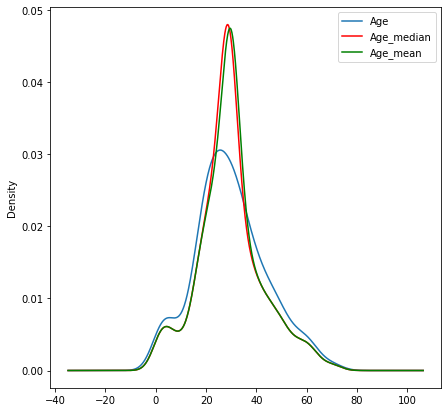

In [20]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

plt.show()

# Here, we can see the change of distribuation

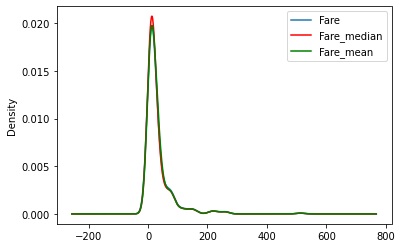

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# Here, not much change happend

In [22]:
# Let's check the co-variance before and after

X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [23]:
# Let's check the co-relation before and after

X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


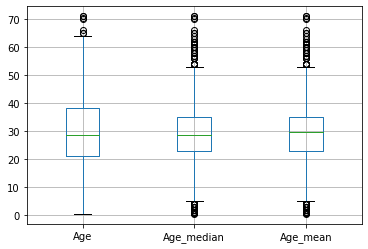

In [24]:
# Here, increase the outliers

X_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

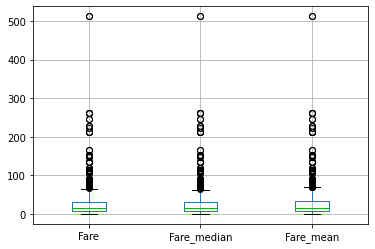

In [25]:
# Here, increase the outliers

X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

### Using Sklearn

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
imputer1 = SimpleImputer(strategy='median')

imputer2 = SimpleImputer(strategy='mean')

In [28]:
trf = ColumnTransformer(transformers=[
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [29]:
trf.fit_transform(X=X_train)

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [30]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [31]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [32]:
X_test = trf.transform(X=X_test)

In [33]:
X_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   